# Extracting Post Titles from Posts.xml for Questions 1 and 2

In [14]:
import xml.etree.ElementTree as ET
from collections import Counter
import re

# Parse the XML file
tree = ET.parse('Posts.xml')
root = tree.getroot()

# Extract the title names into a list
titles = [str(row.get('Title')) for row in root.findall('row')]

# Join the titles into a single string and split into words
all_words = " ".join(titles).lower().split()

# Use a regular expression to remove any non-alphabetic characters
all_words = [re.sub(r'[^a-z]+', '', word) for word in all_words]

# Use the Counter class to count the frequency of each word
word_counts = Counter(all_words)

# Remove elements without a title
del word_counts['none']

# Get the 20 most common words
most_common_words = word_counts.most_common(20)

# Question 1 (30%)

Create a Zip’s law plot (word vs. probability) on the words in the questions’
titles. Does this plot follow your expectations of Zip’s law? Discuss this in a paragraph in your solution. Include your plot and refer to it in your discussion.

Zipf's Law graph solution found from https://stackoverflow.com/questions/66445703/how-to-edit-a-graph-in-python-zipfs-law

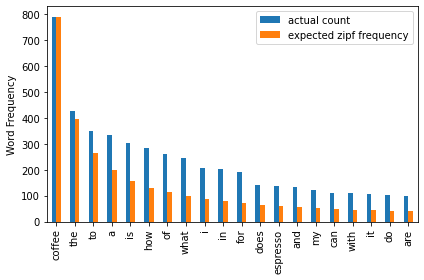

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

def zipf_frequency(most_common_count, n):
  """
  This function creates a list that holds the expected
  frequency values of a set of words based on Zipf's Law
  :param most_common_count
  :param n: int
  """
  # Create a list to store the values
  zipf_law = []
  # For every word in our graph
  for word_index in range(1, n+1):
      # Find the expected value for the frequency of this word
      zipf_law.append(most_common_count/(word_index))
  # Return our frequency list
  return zipf_law

# Make a data frame to track our words and their actual frequency values
top_words_df = pd.DataFrame(most_common_words, columns=['word', 'actual count'])
# Use our function to determine what the expected frequency of the 20 most common words is based on Zipf's Law
top_words_df['expected zipf frequency'] = zipf_frequency(top_words_df.loc[0, 'actual count'], 20)

# Make a graph comparing the frequency of our words with their expected frequency based on Zipf's Law
fig, ax = plt.subplots()
# Label and define our y-axis
top_words_df.plot(kind='bar', ax=ax)
ax.set_ylabel("Word Frequency")
# Label our x-axes with their correlated words
ax.set_xticklabels(top_words_df['word'])
fig.tight_layout()

# Question 2 (30%)

Generating word clouds. Provide two word clouds on the top-20 frequent tokens, once without removing the stop words and another after removing them. You should use the NLTK library for tokenization and stop word removal. In your solution, put the two
figures next to each other and discuss your observations.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


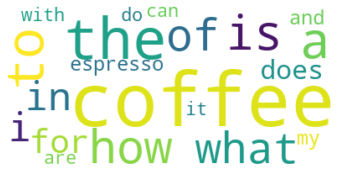

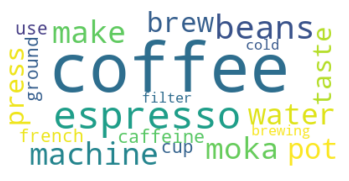

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Get a list of English stopwords
stop_words = set(stopwords.words('english'))

# Find the 100 most common words (needed for determining 20 most common words AFTER stopwords are removed)
expanded_most_common_words = word_counts.most_common(100)

# Create a dictionary of the 20 most common words with stopwords included
words_with_stopwords = dict(most_common_words)

# Create a dictionary of the most common words without stopwords (removes stopwords from a list of 100 common words)
words_without_stopwords = {word: count for word, count in expanded_most_common_words if word.lower() not in stop_words}

# Create a word cloud with stopwords. Uses generate_from_frequencies to determine which words to show
word_cloud = WordCloud(background_color="white", max_words=20).generate_from_frequencies(words_with_stopwords)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Create a word cloud WITHOUT stopwords. Uses generate_from_frequencies to determine which words to show
word_cloud = WordCloud(background_color="white", max_words=20).generate_from_frequencies(words_without_stopwords)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()